# Classification 1

We will look at the **Nearest Neighbors** classifier.

This is also called **instance-based** or **case-based learning**. This is because

* we don't learn a special model,
* we just memorize the training data.

## The Iris Dataset

![Iris-setosa](http://www.nwplants.com/images/perennials/iri_set_jko_061808_alaska_iris2small.JPG "Iris")

The iris plant has showy flowers, and we want to figure out the type of iris from its flower.

In [1]:
from pandas import Series, DataFrame
import pandas as pd
from patsy import dmatrices
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', \
                   names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'iris_class'])
iris[:10]

,sepal_length,sepal_width,petal_length,petal_width,iris_class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


For illustration, let us first do nearest-neighbors with just two features.

In [3]:
iris_2 = iris[['sepal_length', 'sepal_width', 'iris_class']].copy()  # Create a copy of this piece of data
iris_2[:5]

,sepal_length,sepal_width,iris_class
0,5.1,3.5,Iris-setosa
1,4.9,3.0,Iris-setosa
2,4.7,3.2,Iris-setosa
3,4.6,3.1,Iris-setosa
4,5.0,3.6,Iris-setosa


In [4]:
len(iris_2) # how many datapoints total?

150

There are 3 classes in this dataset.

In [5]:
iris_2['iris_class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: iris_class, dtype: int64

Let us convert this into a binary classification problem, such as

* Iris-setosa (the positive class, denoted by 1), versus
* everyone else (the negative class, denoted by 0)

In [6]:
# Create a new 'target' column with all 0
iris_2['target'] = 0.0

# Mask the rows with Iris-setosa, and set them as the positive class
mask = iris_2['iris_class'] == 'Iris-setosa'
iris_2.loc[mask, 'target'] = 1.0
iris_2[:5]

,sepal_length,sepal_width,iris_class,target
0,5.1,3.5,Iris-setosa,1.0
1,4.9,3.0,Iris-setosa,1.0
2,4.7,3.2,Iris-setosa,1.0
3,4.6,3.1,Iris-setosa,1.0
4,5.0,3.6,Iris-setosa,1.0


### Create design matrices

In [7]:
Y, X = dmatrices('target ~ 0 + sepal_length + sepal_width',
                 iris_2,return_type="dataframe")
print('Design matrix X')
print(X[:5])
print('Outcomes Y')
print(Y[:5])

Design matrix X
   sepal_length  sepal_width
0           5.1          3.5
1           4.9          3.0
2           4.7          3.2
3           4.6          3.1
4           5.0          3.6
Outcomes Y
   target
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0


The outcomes should be a list, but it comes out as a DataFrame with one column. The values of the column will give us the list we need.

In [8]:
y = Y['target'].values
print(y[:5])

[1. 1. 1. 1. 1.]


### Plot the data

Text(0, 0.5, 'Sepal width')

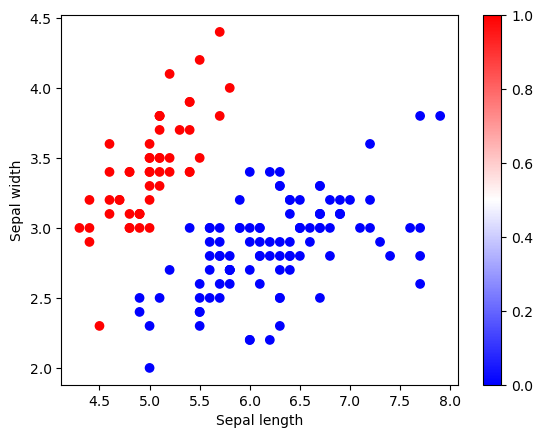

In [9]:
sc = scatter(iris_2['sepal_length'], iris_2['sepal_width'], c=y, cmap='bwr')
colorbar(sc)
xlabel('Sepal length')
ylabel('Sepal width')

The command

> scatter(iris_2['sepal_length'], iris_2['sepal_width'], c=y, cmap='bwr')

plots 

* sepal_length along the X-axis, 
* sepal_width along the Y-axis, and
* uses the y list we just created (containing the classes) to assign colors to each point
    * Since y is binary, it uses two colors
* use the _colormap_ called 'bwr', which goes from blue (b) to white (w) to red (r), dependending on the value of y
    * the minimum value of y (i.e., 0) gets the color blue
    * the maximum value of y (i.e., 1) gets red
    * intermediate values, if they had existed, would have been colored white

### Split the data into training and testing sets

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Here, we are splitting the data (represented as the matrices X and y) into:

* a **training set** of size 70%, and
* a **testing set** of size 30% (from _test\_size=0.3_)

It also **randomizes** the data, so that any strange patterns in the _order_ of the datapoints is removed.

In [11]:
y_train[:5]

array([0., 1., 1., 1., 0.])

The *random_state* parameter just ensures we get the same random split each time, and is useful for debugging. In practice, we don't need to use it.

### Set up the classifier

In [12]:
from sklearn import neighbors
model = neighbors.KNeighborsClassifier(n_neighbors=15,
                                       weights='uniform',
                                       p=2)

The parameters have the following meanings:

* **n_neighbors:** how many nearest neighbors of any point should we use?
* **weights:** how should we weigh the nearest neighbors?
    * _uniform_: all contribute equally
    * _distance_: those that are closer contribute more
* **p:** How should we compute distances?
    * _p=2_: the usual distance (Euclidean)
    * _p=1_: "Manhattan" distance

### Fit the classifier

In [13]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

How well does fit the training data?

Let's consider the first 5 training instances.

In [14]:
X_train.iloc[0:5]

,sepal_length,sepal_width
118,7.7,2.6
18,5.7,3.8
4,5.0,3.6
45,4.8,3.0
59,5.2,2.7


Let's see the predictions our classifier makes, using **predict()**.

In [15]:
print('Predictions =', model.predict(X_train.iloc[0:5]))

Predictions = [0. 1. 1. 1. 0.]


So the first and fifth points are predicted to be in the negative class (NOT Iris-setosa), while the others are predicted to be positive class.

And what are the actual classes?

In [16]:
y_train[0:5]

array([0., 1., 1., 1., 0.])

Now let us run it on the entire training data.

In [17]:
from sklearn import metrics
prediction_on_training = model.predict(X_train)
print(metrics.accuracy_score(y_train, prediction_on_training))

0.9904761904761905


The classifier is not 100%-accurate even on training data.

* The data might be noisy.
* The classifier might not be powerful or complex enough to represent all classes.

Text(0, 0.5, 'Sepal width')

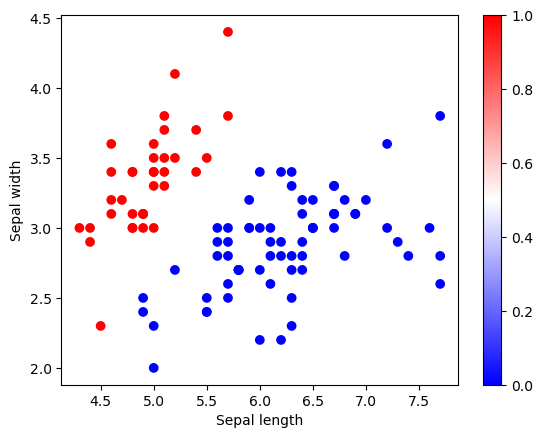

In [18]:
sc = scatter(X_train['sepal_length'], X_train['sepal_width'], c=y_train, cmap='bwr')
colorbar(sc)
xlabel('Sepal length')
ylabel('Sepal width')

Guess which point causes problems?

To get the **scores** instead of just the classifications, use **predict_proba()**.

In [19]:
model.predict_proba(X_train.iloc[0:5])

array([[1.        , 0.        ],
       [0.26666667, 0.73333333],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.66666667, 0.33333333]])

Consider the second datapoint. The probabilities of the two classes are:

* Class 0 (negative class) has probability 0.27
* Class 1 (positive class) has probability 0.73

When we try to predict the _class_ instead of the score, what result were we getting?

In [20]:
model.predict(X_train.iloc[0:5])

array([0., 1., 1., 1., 0.])

### Predict on the testing set

Let us plot the test data.

Text(0, 0.5, 'Sepal width')

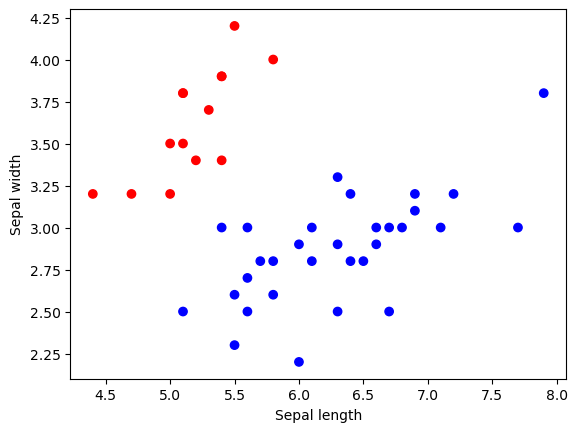

In [21]:
scatter(X_test['sepal_length'], X_test['sepal_width'], c=y_test, cmap='bwr')
xlabel('Sepal length')
ylabel('Sepal width')

In [22]:
predicted_classes = model.predict(X_test)
print(metrics.accuracy_score(y_test, predicted_classes))

1.0


As expected...

Let us do this for a different class:

* Iris-versicolor (positive class), versus
* everyone else (negative class)

#### Create new target classes

In [23]:
# Create a new 'target' column with all 0
iris_2['target'] = 0.0

# Mask the rows with Iris-versicolor, and set them as the positive class
mask = iris_2['iris_class'] == 'Iris-versicolor'
iris_2.loc[mask, 'target'] = 1.0

#### Create design matrices

In [24]:
Y, X = dmatrices('target ~ 0 + sepal_length + sepal_width', iris_2, return_type='dataframe')
y = Y['target'].values

#### Plot the data

Text(0, 0.5, 'Sepal width')

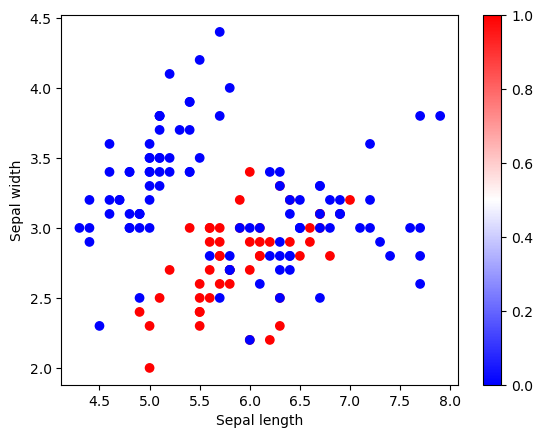

In [25]:
sc = scatter(X['sepal_length'], X['sepal_width'], c=y, cmap='bwr')
colorbar(sc)
xlabel('Sepal length')
ylabel('Sepal width')

Looks much harder this time...

#### Build training and testing sets

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#### Fit the model

In [27]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

#### Accuracy on training set

In [28]:
predicted_classes_train = model.predict(X_train)
print(metrics.accuracy_score(y_train, predicted_classes_train))

0.8095238095238095


#### Accuracy on test set

In [29]:
predicted_classes = model.predict(X_test)
print(metrics.accuracy_score(y_test, predicted_classes))

0.7555555555555555


This is typical; training accuracy overestimates test accuracy.

We were only using sepal length and sepal width. Let's see if using all the features will help...

In [30]:
# Create the 'target' column
iris['target'] = 0.0
mask = iris['iris_class'] == 'Iris-versicolor'
iris.loc[mask, 'target'] = 1.0

In [31]:
Y, X = dmatrices('target ~ 0 + sepal_length + sepal_width + petal_length + petal_width',
                 iris,
                 return_type='dataframe')
y = Y['target'].values

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [33]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

#### Accuracy on training set

In [34]:
predicted_classes_train = model.predict(X_train)
print(metrics.accuracy_score(y_train, predicted_classes_train))

0.9523809523809523


#### Accuracy on test set

In [35]:
predicted_classes = model.predict(X_test)
print(metrics.accuracy_score(y_test, predicted_classes))

0.9777777777777777


Surprisingly, it does even better on test than on the training set!

Why does it do so well?

Must be something about the two new features we added.

Let's try plotting them, just to see.

Text(0, 0.5, 'Petal width')

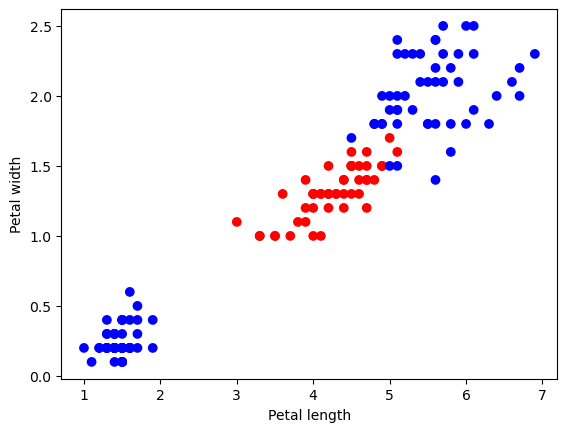

In [36]:
scatter(X['petal_length'], X['petal_width'], c=y, cmap='bwr')
xlabel('Petal length')
ylabel('Petal width')

We **do** get much cleaner demarcation with these two features.

### Varying model parameters

We were using 15 nearest neighbors, and weighting them equally ("uniform" weights). Let's try varying these and picking the right parameter via cross-validation.

First, we set up cross-validation with a simple example.

In [37]:
from sklearn import model_selection

kfold = model_selection.StratifiedKFold(n_splits=3).split(X=X[:6], y=[0,0,0,1,1,1])

This tells python that

* we want to do 3-fold cross-validation (3 "splits"),
* we have 6 total datapoints,
* the class labels are given by y
    * first three datapoints are negative
    * last three are positive, and

* (The X parameter is ignored, but for some silly reason, we must still provide it.)

This "kfold" object can now be used in a for loop.

In [38]:
for train, holdout in kfold:
    print('train indices =', train, 'holdout indices =', holdout)

train indices = [1 2 4 5] holdout indices = [0 3]
train indices = [0 2 3 5] holdout indices = [1 4]
train indices = [0 1 3 4] holdout indices = [2 5]


* This splits n=6 datapoints into train and test, and
* gives us the indices for points in the training set and the test set.
* The splits are such that each fold has roughly the same ratio of positive to negative examples as the full dataset.

Now let's do the same thing with our iris data.

Let us write a function that computes the average classification accuracy over all 3 folds for some given number of nearest neighbors.

In [39]:
def cv_accuracy_score(X, y, nn):
    """For each fold, fit the nearest neighbors model
    with nn nearest neighbors on the train, and return accuracy
    on the test."""
    
    model = neighbors.KNeighborsClassifier(n_neighbors=nn,
                                           weights='uniform')
    accuracies = []
    
    kfold = model_selection.StratifiedKFold(n_splits=3, shuffle=True).split(X, y)
    for train, holdout in kfold:
        # Select the training and testing data using the indices
        # provided by kfold
        X_train = X.iloc[train]
        X_holdout = X.iloc[holdout]
        y_train = y[train]
        y_holdout = y[holdout]
        
        # Fit the model
        model.fit(X_train, y_train)
        
        # Compute test accuracy
        accuracy = metrics.accuracy_score(y_holdout, model.predict(X_holdout))
        accuracies.append(accuracy)
    
    average_accuracy = Series(accuracies).mean()
    return average_accuracy

In [40]:
cv_accuracy_score(X, y, nn=1)

0.96

Now we check the cross-validates accuracy for various number of nearest neighbors.

Let's create a sequence of number of nearest neighbors we want to check.

In [41]:
nn = [1] + [(x + 1) * 5 for x in range(19)]
print(nn)

[1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]


Get the corresponding cross-validation accuracy scores.

In [42]:
scores = [cv_accuracy_score(X, y, num_nbrs) for num_nbrs in nn]

Let's plot the scores versus the number of nearest neighbors.

Text(0, 0.5, 'Accuracy of classifier')

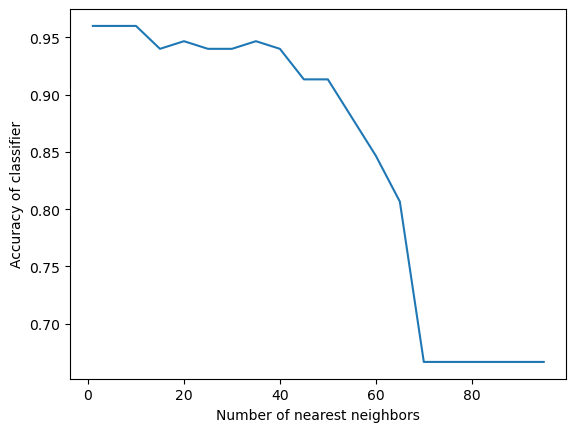

In [43]:
plot(nn, scores)
xlabel('Number of nearest neighbors')
ylabel('Accuracy of classifier')

#### How many nearest neighbors should we choose?

* Roughly 10-15 looks right.
* Even 1 nearest-neighbor does pretty well!

#### Why does accuracy a bit more than 65% after around 70 nearest neigbors?

* For any test point, almost everyone in the training set is considered a "near neighbor"

* Two-thirds of the training data is negative, one-third is positive
    * We have "Iris-versicolor" as positive
    * and "Iris-setosa" and "Iris-virginica" as negative

So what is the prediction?

* The classifier predicts **negative class** for _all test points_.

How often is this prediction correct?

* Two-thirds of the test data is negative ("iris-setosa" or "iris-virginica")
    * i.e., 66.67% of the time